# Data Preprocessing And Visualisation

In [1]:
#Imported Important Library, Module.
import cv2
import pandas as pd
import numpy as np
import os
import seaborn as sns
import tensorflow as tf
from skimage.feature import hog
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from random import shuffle
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler


In [2]:
#Fetching Links of Image Directories
DATADIR='./X-Ray_2000'
COVID_PATH='./X-Ray_2000/covid'
NORMAL_PATH="./X-Ray_2000/normal"

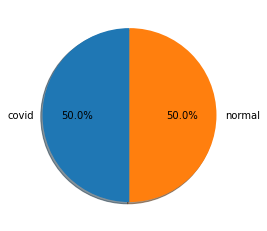

In [3]:
#Pi-chart for the dataset distribution.
class_names = os.listdir(DATADIR)
image_count = {}
for i in class_names:
    image_count[i] = len(os.listdir(os.path.join(DATADIR,i)))

#Plotting Distribution of Each Classes
fig1, ax1 = plt.subplots()
ax1.pie(image_count.values(),
        labels = image_count.keys(),
        shadow=True,
        autopct = '%1.1f%%',
        startangle=90)
plt.show()

<ipython-input-5-ca7b8da5903e>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


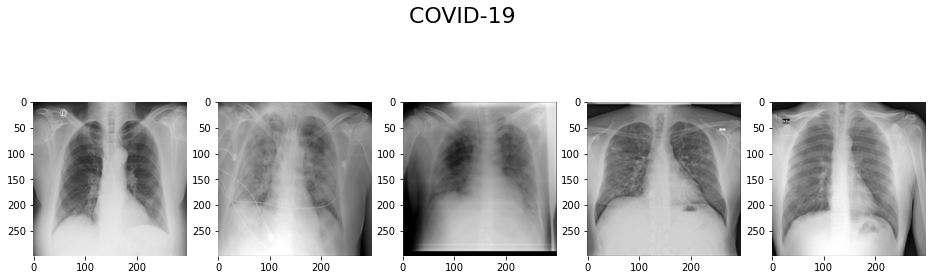

In [5]:
#Viewing Some Chest X-Ray Images of Covid-19 
fig = plt.figure(figsize=(16,5))
fig.suptitle("COVID-19 ", size=22)
img_paths = os.listdir(COVID_PATH)
shuffle(img_paths)

for i,image in enumerate(img_paths[:5]):
    img = cv2.imread(os.path.join(COVID_PATH, image))
    plt.subplot(1,5, i+1, frameon=False)
    plt.imshow(img)
fig.show()

<ipython-input-6-95ca38a66632>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


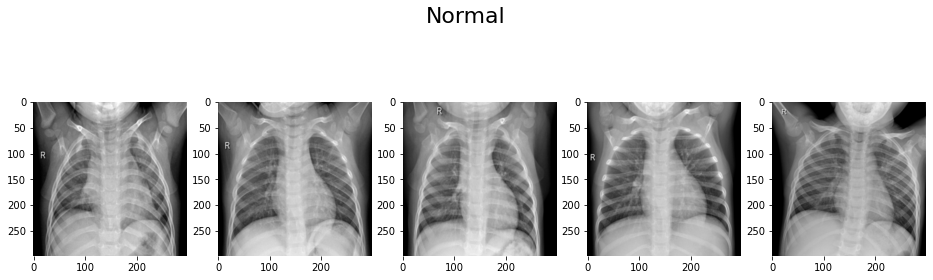

In [6]:
#Viewing Some Chest X-Ray Images of Normal Patients
fig = plt.figure(figsize=(16,5))
fig.suptitle("Normal", size=22)
img_paths = os.listdir(NORMAL_PATH)
shuffle(img_paths)

for i,image in enumerate(img_paths[:5]):
    img = cv2.imread(os.path.join(NORMAL_PATH, image))
    plt.subplot(1,5, i+1, frameon=False)
    plt.imshow(img)
fig.show()

In [7]:
len(os.listdir("X-Ray_2000/covid"))

2000

In [8]:
len(os.listdir("X-Ray_2000/normal"))

2000

In [9]:
#Checking The Image Dimension 
img.shape

(299, 299, 3)

In [10]:
#Fetching metdata of Covid Images.
df = pd.read_excel('COVID.metadata.xlsx')
#checking Top 5 of the metdata
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [12]:
#fetching the path of covid-images.
urls = os.listdir('X-Ray_2000/covid')
path = "X_Ray_2000/covid/"+ urls[0]



In [14]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
#     plt.imshow(img)
#     print(img_path)
    img = img / 255.0
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [15]:
#label of covid images is 1.
covid_path = "X-Ray_2000/covid"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [16]:
len(covidUrl), len(covidImages)

(2000, 2000)

In [17]:
#label of normal images is 0
normal_path = "X-Ray_2000/normal"
normal_urls = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_urls, 0)

In [18]:
print("covid image dimension and count: {} normal image dimension and count: {}" .format(covidImages.shape,normalImages.shape))

covid image dimension and count: (2000, 100, 100, 3) normal image dimension and count: (2000, 100, 100, 3)


In [19]:
covidImages = np.asarray(covidImages)
normalImages = np.asarray(normalImages)

In [20]:
#checking the dimesions of the images.
print(covidImages.ndim)

4


In [21]:
#concatenating both normal image and covid image and collecting it as a data...
data = np.r_[covidImages, normalImages]

In [22]:
len(data)

4000

In [24]:
#cheing the size of the data 
data=data.reshape((4000,30000))
print("{} {}" .format(data.shape,data.ndim))

(4000, 30000) 2


In [25]:
#concatenating the label of the images
#only two targets is there.
# 1 stands for the covid images.
#0 stands for the normal images.
targets = np.r_[covidTargets, normalTargets]
targets.shape


(4000,)

# Splitting Datasets Between Training And Testing. 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

# Training The Model

In [29]:
#Note:: To apply SVM we have to first reduce the dimesion of the images.
#Svm work only on with dimesion <=2.
from sklearn.svm import SVC
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=2)

# fit model
svm.fit(x_train, y_train)

SVC(kernel='linear', probability=True, random_state=2)

# EValuation

In [30]:
# generate predictions
y_pred = svm.predict(x_test)
print(y_pred)
print(y_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

[0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1
 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 1
 1 1 1 0 1 1 0 0 1 1 1 0 

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[393  91]
 [ 42 474]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.86       484
           1       0.84      0.92      0.88       516

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



<AxesSubplot:>

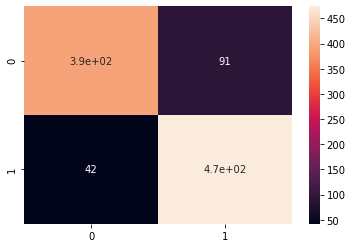

In [32]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

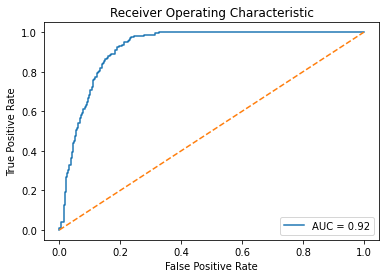

In [33]:
# predict probabilities for X_test using predict_proba
probabilities = svm.predict_proba(x_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');